# Problem Set 1 - KNN
## CSCI 5622 - Spring 2020

For today's assignment, we will be implementing our own K-Nearest Neighbors (KNN) algorithm.

*But Professor Quigley, hasn't someone else already written KNN before?*

Yes, you are not the first to implement KNN, or basically any algorithm we'll work with in this class. But
1. I'll know that you know what's really going on
2. You'll know you can do it, because
    1. someday you might have to implement some machine learning algorithm from scratch - maybe for a new platform (do you need to run python on your SmartToaster just to get it to learn how users like their toast?), maybe because you want to tweak the algorithm (there's always a better approach...),
    2. maybe because you're working on something important, and you need to control exactly what's on there (should you really be running anaconda on your secret spy plane?).

That said - we're not going to implement *everything*. We'll start by importing a few helper functions

In [183]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.neighbors
import sklearn.datasets

*Wait a minute - didn't we just import Scikit-learn (sklearn)? The package with baked-in machine learning tools?*

Yes - but it also has a ton of helper functions, including a dataset we'll be using later. But first, let's also create a dataset to play with and start working to build out our own classifier.

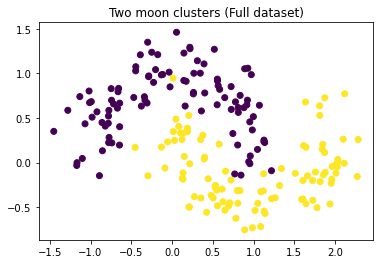

In [184]:
X, y = sklearn.datasets.make_moons(n_samples=200, noise=0.19, random_state=42)
X_train, y_train = X[:100], y[:100]
X_test, y_test = X[100:], y[100:]
plt.title("Two moon clusters (Full dataset)")
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

We have data!

Now, let's set up a KNNClassifier class. 

The KNNClassifier class will have similar design to the K-Nearest Neighbors classifier class from *scikit-learn*:
- Initialize the classifier with corresponding parameters (number of neighbors k)
- Fit the classifier using the training data
- Predict the class of new points `X_test`

We've written out a lot of the structure for you so it will be consistent and we can use / reuse it, and you can focus on the "important" stuff that actually relates to the machine learning itself.

In [185]:

class KNNClassifier:

    def __init__(self, k = 5):
        """
        Initialize our custom KNN classifier
        PARAMETERS

        k - the number of nearest neighbors to consider for classification
        """
        self._k = k
        self._model = None
        self._y = None
        self.label_to_index = None
        self.index_to_label = None
        self.counts = 0

    def fit(self, features, labels):
        """
        :param features: 2-D np.array of shape (number training samples, features dimension)
        :param labels: 1-D np.array of shape (number training samples,)
        :return: self
        """
        self._model = sklearn.neighbors.BallTree(features)
        self._y = labels
        self.counts = self.get_counts()
        # Should be used to map the classes to {0,1,..C-1} where C is the number of classes
        self.label_to_index = dict(zip(sorted(self.counts.keys()), range(len(self.counts))))
        self.index_to_label = dict(zip(range(len(self.counts)), sorted(self.counts.keys())))
        return self

    def get_counts(self):
        """
        Creates a dictionary storing the count of elements of each class
        :return: dict where the keys are the classes and values are the counts
        """
        counts = dict()
        #BEGIN Workspace 1.1
        #TODO: Modify and/or add to counts so that it returns a count of each answer class found in y
        # get number of counts per label
        cnt = np.bincount(y)
        # create dictionary containing label counts
        counts = dict(zip(range(len(y)), cnt))
        #END Workspace 1.1
        return counts

    def majority_vote(self, indices):
        """
        Given indices, report the majority label of those points.
        FOR A TIE, report the most common label in the data set.
        :param indices: indices of training neighbors of shape (M, k) where k the classifier parameter
        :return: The majority label for each set of indices, shape (M,)
        """
        labels = None # REPLACE
        #BEGIN Workspace 1.2
        #TODO: Determine majority, assign it to label
        # take in indices array and flatten
        indices = indices.flatten()
        # get labels for corresponding indices
        lbls = self._y[indices]
        # find the number of times each label was found
        cnts = np.bincount(lbls)
        # get label that contains most votes
        labels = cnts.argmax()
        #END Workspace 1.2
        return labels

    def predict(self, points):
        """
        Given new data points, classify then according to the training data provided in fit and number of neighbors k
        :param point: feature vectors (num_points, num_features)
        :return: 1-D np.array of predicted classes of shape (num_points,)
        """
        answer = 0
        #BEGIN Workspace 1.3
        #TODO: perform classification of points here
        #HINT: use the majority function created above
        #HINT: use the euclidean distance discussed in lecture to find nearest neighbors
        # set answer to empty array 
        answer = np.zeros((points.shape[0],))
        # iterate through number of points
        for i, pt in enumerate(points):
            # query point information from ball tree
            _, ind = self._model.query(pt.reshape(1, -1), k=self._k)
            # get label with majority vote
            ans = self.majority_vote(ind)
            # append answer
            answer[i] = ans
        #END Workspace 1.3
        return answer

    def confusion_matrix(self, features_test, labels_test):
        """
        Generate the confusion matrix for the given test data
        :param features_test: an np.array of feature vectors of test points, shape (N, n_features)
        :param labels_test: the corresponding correct classes of our test set, shape (N,)
        :return: an C*C np.array of counts, where C is the number of classes in our classifier
        """
        c_matrix = np.array(None) # REPLACE
        
        #BEGIN Workspace 1.4
        #TODO: Run classification for the test set, compare to test answers, and add counts to matrix
        # set N equal to number of classes found
        N = max(self._y) + 1
        # create confusion matrix initialized with zeros
        c_matrix = np.zeros((N,N))
        # loop through all points in features_test and labels_test arrays
        for i, pt in enumerate(features_test):
            # get class prediction, had to type cast as int because predict function returned float
            predict = int(self.predict(np.array([pt])))
            # predict = classification (column index) from lecture 2 slide 25
            c_matrix[labels_test[i]][predict] += 1
        #END Workspace 1.4
        return c_matrix

    def accuracy(self, features_test, labels_test):
        """
        Generate an accuracy score for the classifier based on the confusion matrix
        PARAMETERS
        C - an np.array of counts
        RETURN
        score - an accuracy score
        """
        score = 0
        #BEGIN Workspace 1.5
        #TODO: Compute accuracy of the classification of X_test
        # find confusion matrix
        cm = self.confusion_matrix(features_test, labels_test)
        # calculate accuracy. accuracy = # correct / # total (lecture 2 slide 23)
        score = np.trace(cm) / np.sum(cm)
        #END Workspace 1.5
        return score


*But professor, this code isn't complete!*

### Problem 1: Complete our KNN Classifier - 25 Points

1.1 - Complete the `get_counts` function to return the count of each class found in the training set (5 points)

1.2 - Complete the `majority_vote` function to determine the majority class of a series of neighbors (5 points)

1.3 - Complete the `predict` function to capture the predicted class of a new datapoint (5 points)

 - HINT: Use the BallTree documentation to determine how to retrieve neighbors from the model (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html#sklearn.neighbors.BallTree)

1.4 - Complete the `confusion_matrix` function to reveal the results of classification (5 points)

1.5 - Complete the `accuracy` function to get accuracy of the classifier based on a given test data (5 points)

Below, we'll be using our KNNClassifier (sent in as "model") to show how we would predict any points in space given the input data.

In [186]:
def show_decision_surface(model):
    """
    Helper function to visualize the decision surface of model
    :param model: Initialized KNNClassifier
    :return: None
    """
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    x_grid = np.arange(x_min, x_max, 0.1)
    y_grid = np.arange(y_min, y_max, 0.1)
    xx, yy = np.meshgrid(x_grid, y_grid)
    r1, r2 = xx.reshape(-1,1), yy.reshape(-1,1)
    grid = np.hstack((r1,r2))
    y_hat = model.predict(grid)
    zz = y_hat.reshape(xx.shape)
    plt.contourf(xx, yy, zz, cmap='PiYG')
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.show()

1.6. Try different values of k and report their accuracies and confusion matrices on the test set. Make sure to keep `random_state=42` so that the reported values don't change when code is re-run (5 points)

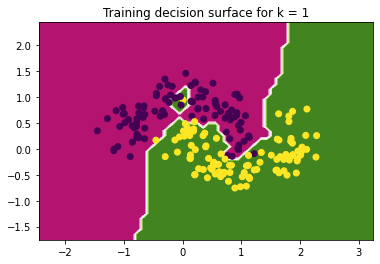

Accuracy when k=1:  0.92
Confusion matrix when k=1: 
[[44.  5.]
 [ 3. 48.]]


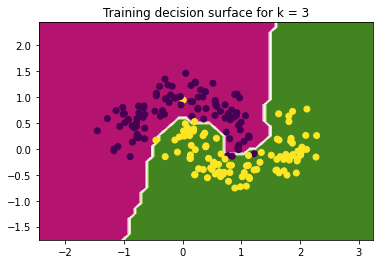

Accuracy when k=3:  0.96
Confusion matrix when k=3: 
[[47.  2.]
 [ 2. 49.]]


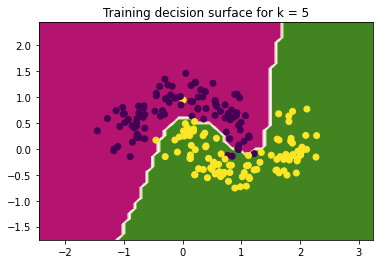

Accuracy when k=5:  0.97
Confusion matrix when k=5: 
[[47.  2.]
 [ 1. 50.]]


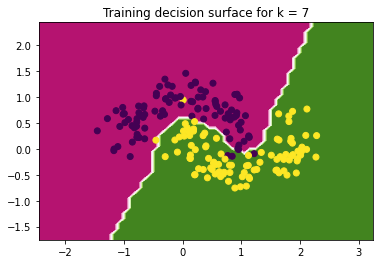

Accuracy when k=7:  0.97
Confusion matrix when k=7: 
[[47.  2.]
 [ 1. 50.]]


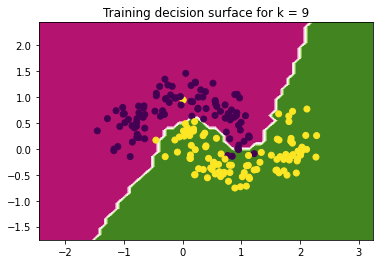

Accuracy when k=9:  0.97
Confusion matrix when k=9: 
[[47.  2.]
 [ 1. 50.]]


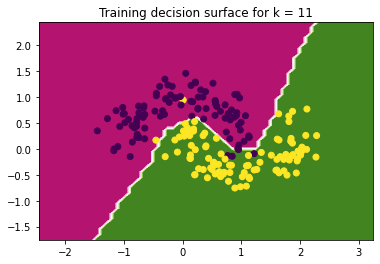

Accuracy when k=11:  0.96
Confusion matrix when k=11: 
[[46.  3.]
 [ 1. 50.]]


In [188]:
#BEGIN Workspace 1.6
#TODO: Try different Ks        
kk = 1
model = KNNClassifier(k=kk)
model = model.fit(X_train, y_train)
plt.title("Training decision surface for k = {}".format(kk))
show_decision_surface(model)
cm = model.confusion_matrix(X_test, y_test)
model_score = model.accuracy(X_test, y_test)
print(f"Accuracy when k={kk}: ", model_score)
print(f"Confusion matrix when k={kk}: ")
print(cm)

kk = 3
model = KNNClassifier(k=kk)
model = model.fit(X_train, y_train)
plt.title("Training decision surface for k = {}".format(kk))
show_decision_surface(model)
cm = model.confusion_matrix(X_test, y_test)
model_score = model.accuracy(X_test, y_test)
print(f"Accuracy when k={kk}: ", model_score)
print(f"Confusion matrix when k={kk}: ")
print(cm)

kk = 5
model = KNNClassifier(k=kk)
model = model.fit(X_train, y_train)
plt.title("Training decision surface for k = {}".format(kk))
show_decision_surface(model)
cm = model.confusion_matrix(X_test, y_test)
model_score = model.accuracy(X_test, y_test)
print(f"Accuracy when k={kk}: ", model_score)
print(f"Confusion matrix when k={kk}: ")
print(cm)

kk = 7
model = KNNClassifier(k=kk)
model = model.fit(X_train, y_train)
plt.title("Training decision surface for k = {}".format(kk))
show_decision_surface(model)
cm = model.confusion_matrix(X_test, y_test)
model_score = model.accuracy(X_test, y_test)
print(f"Accuracy when k={kk}: ", model_score)
print(f"Confusion matrix when k={kk}: ")
print(cm)

kk = 9
model = KNNClassifier(k=kk)
model = model.fit(X_train, y_train)
plt.title("Training decision surface for k = {}".format(kk))
show_decision_surface(model)
cm = model.confusion_matrix(X_test, y_test)
model_score = model.accuracy(X_test, y_test)
print(f"Accuracy when k={kk}: ", model_score)
print(f"Confusion matrix when k={kk}: ")
print(cm)

kk = 11
model = KNNClassifier(k=kk)
model = model.fit(X_train, y_train)
plt.title("Training decision surface for k = {}".format(kk))
show_decision_surface(model)
cm = model.confusion_matrix(X_test, y_test)
model_score = model.accuracy(X_test, y_test)
print(f"Accuracy when k={kk}: ", model_score)
print(f"Confusion matrix when k={kk}: ")
print(cm)
#END Workspace 1.6

In [189]:
# Code for 1.6


#### Write up for 1.6 here
The accuracy was highest when the values for k were 5, 7 or 9. The classifier still worked really well for the other values of k however. You can see from the confusion matrices that there were some subtle changes as to which label was misclassified. 

### Bonus (for the avid machine learner) (5 Points)
1.7. For which value of $k$ is the classifier consistent? (Only worry about this question within our `random_state=42` constraint)

1.8. Edit your `KNNClassifier` so that it's consistent for all $k$ (This solution should work beyond our `random_state=42` constraint, but retain the constraint when submitting your code above)

For a definition of a consistent classifier, refer to [Consistent Classification, Firm and Soft by Barum](https://proceedings.neurips.cc/paper/1996/file/7bb060764a818184ebb1cc0d43d382aa-Paper.pdf) (The answer is found in the abstract and introduction sections of the paper) 

#### Write up for the bonus

***
OK - now we've demonstrated that our KNN classifier works, let's think about our problem space! 

## Our Dataset - Identifying Digits from Images

It's a pretty common problem - just imagine working at the post office, and you're handed a hand-written check,
and you have to identify exactly what it says.
Did they pay 500 or 600 dollars? Is the letter going to 80309 (campus) or 30309 (Atlanta)?

Let's be a little smart about this - let's up some classes and helper functions to help us out.

### Problem 2: Implement KNN on Digits dataset - 25 Points

2.1 **Randomly** divide our digit dataset into training and testing sets (10 Points)

2.2 Report the number of examples in training and testing, as well as measuring then number of pixels in each image (5 points)

2.3 Create a confusion matrix of our classifier for K = 5 (10 points) *HINT: Doing this may cause you to catch mistakes in your classifier. Go fix those!*

In [190]:

class Numbers:
    def __init__(self, k=5):
        # set number of neighbors
        self._k = k
        #load data from sklearn
        data = sklearn.datasets.load_digits()
        features = data["data"]
        self.labels = data["target"]
        self.features = features.reshape(features.shape[0], -1)
        
        # BEGIN Workspace 2.1        
        self.train_x = np.array(None) # A 2D np.array of training examples, REPLACE
        self.train_y = np.array(None) # A 1D np.array of training answers, REPLACE
        self.test_x = np.array(None) # A 2D np.array of testing examples, REPLACE
        self.test_y = np.array(None) # A 1D np.array of testing answers, REPLACE
        self.classifier = None # KNNClassifier, REPLACE
        
        # TODO: - Divide our dataset into Train and Test datasets (80/20 split),
        #        replacing the variables above
        #       - Initialize the classifier

        # begin by dividing dataset into training and test sets (80/20 split)
        split = int(0.80 * len(self.features))
        self.train_x = self.features[:split]
        self.train_y = self.labels[:split]
        self.test_x = self.features[split:]
        self.test_y = self.labels[split:]

        # randomize training and test data sets
        # motivated by: https://www.delftstack.com/howto/numpy/python-numpy-shuffle-two-arrays/ 
        # training data randomization
        train_rnd = np.arange(len(self.train_x))
        np.random.shuffle(train_rnd)
        self.train_x = self.train_x[train_rnd]
        self.train_y = self.train_y[train_rnd]

        # test data randomization
        test_rnd = np.arange(len(self.test_x))
        np.random.shuffle(test_rnd)
        self.test_x = self.test_x[test_rnd]
        self.test_y = self.test_y[test_rnd]

        # KNN classifier initialization, default number of k neighbors
        self.classifier = KNNClassifier(k=self._k)
        #END Workspace 2.1
        
    def report(self):
        """
        Report information about the dataset using the print() function
        """
        #BEGIN Workspace 2.2
        #TODO: Create printouts for reporting the size of each set and the size of each datapoint
        print(f"Total number of examples in dataset: {len(self.features)}.")
        print(f"Number of training set examples: {len(self.train_x)}.")
        print(f"Number of test set examples: {len(self.test_x)}.")
        print(f"Number of pixels in each image: {self.features[0].shape[0]}.")
        #END Workspace 2.2

    def classify(self):
        """
        Fits classifier using the training data and generate a confusion matrix for the test data
        then return the confusion matrix
        """
        #BEGIN Workspace 2.3.a
        #TODO: Create classifier from training data, generate confusion matrix for test data
        # fit model using the training data
        model = self.classifier.fit(self.train_x, self.train_y)
        # create confusion matrix using test data
        c_matrix = model.confusion_matrix(self.test_x, self.test_y)
        #END Workspace 2.3.a
        return c_matrix
        
    def accuracy(self):
        c_matrix = self.classify()
        accuracy = 0
        #BEGIN Workspace 2.3.b
        #TODO: Compute accuracy using confusion matrix
        # calculate accuracy. accuracy = # correct / # total (lecture 2 slide 23)
        accuracy = np.trace(c_matrix) / np.sum(c_matrix)
        #END Workspace 2.3.b
        return accuracy

    def view_digit(self, index):
        """
        Display an image of a digit
        PARAMETERS
        digitImage - a data object from the dataset
        """
        #TODO: process digit_image to matrix "image"
        digit_image = self.features[index]
        image = digit_image.reshape(8, -1)
        print("Image for digit {}".format(self.labels[index]))
        plt.matshow(image)
        plt.show()
    
    @staticmethod
    def display_confusion(c_matrix):
        fig, ax = plt.subplots()
        ax.matshow(c_matrix, cmap=plt.cm.Blues)
        for i in range(c_matrix.shape[0]):
            for j in range(c_matrix.shape[0]):
                ax.text(i, j, str(c_matrix[j,i]), va='center', ha='center')
        plt.show()
        

Total number of examples in dataset: 1797.
Number of training set examples: 1437.
Number of test set examples: 360.
Number of pixels in each image: 64.
Image for digit 0


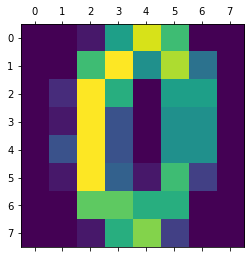

In [191]:
numbers = Numbers()
numbers.report()
numbers.view_digit(10)

*Wow, I can't believe we just created a KNN Classifier for multiple classes - but can't we make it better?*

Yes, we saw above that our classifier didn't work perfectly. Let's explore that issue a little further by turning the $K$ and random split knobs

### Problem 3: Improving KNN on Digits - 20 Points

3.1 Determine which classes are most often confused (from our confusion matrix above), inspect some examples of these digits (using the `view_digit` function in our Numbers class), and write a brief (4 - 5 sentences) description of why you think these particular numbers may be misclassified. (10 pts)

3.2 Explore the influence of the number of nearest neighbors (i.e. try changing our K). Plot the relationship between K and accuracy, and write a brief (4 - 5 sentences) description of how this factor impacts our accuracy. To mitigate the effect of randomness from the split, you have to run the evaluation multiple times and report the mean accuracy. Make sure the runs for different Ks are done on the same splits. (5 pts)

3.3 Explore the influence of the train / test split of our data (i.e. copy our Numbers class into Numbers2 below and try changing the split for our dataset). Plot the relationship between the split % and accuracy, and write a brief (4 - 5 sentences) description of its impact. (5 pts)

You can complete the `NumbersKnobs` class and use it as you see fit. But it's only necessary for 3.3

Total number of examples in dataset: 1797.
Number of training set examples: 1437.
Number of test set examples: 360.
Number of pixels in each image: 64.


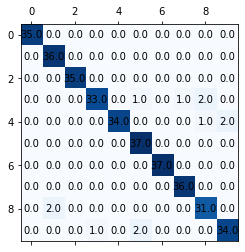

Accuracy:  0.9666666666666667
Image for digit 3


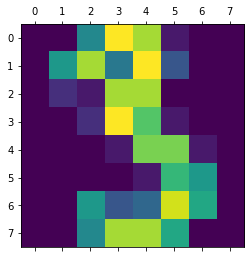

Image for digit 8


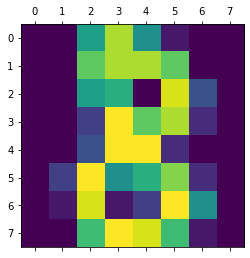

Image for digit 4


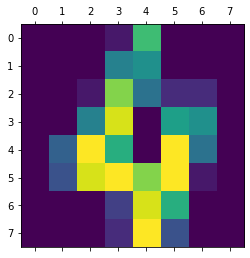

Image for digit 9


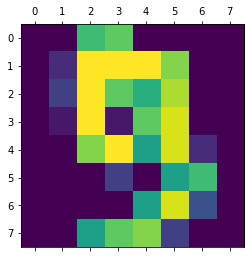

Image for digit 1


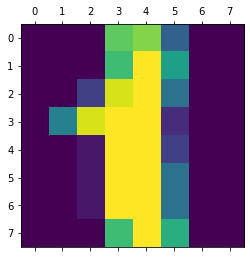

Image for digit 8


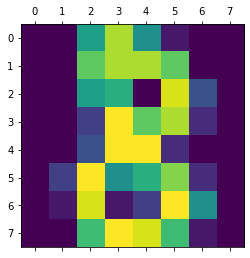

In [192]:
#BEGIN 3.1a
#TODO: Print out problem class images
nums = Numbers(k=3)
nums.report()
cm = nums.classify()
nums.display_confusion(cm)
nums_acc = nums.accuracy()
print("Accuracy: ", nums_acc)
# first pair of numbers that were most misclassified
numbers.view_digit(3)
numbers.view_digit(8)
# second pair of numbers that were most misclassified
numbers.view_digit(4)
numbers.view_digit(9)
# third pair of numbers that were most misclassified
numbers.view_digit(1)
numbers.view_digit(8)
#END 3.1a

#### 3.1b
TODO: Write description of mis-classification

I chose to use the numbers 3 and 8 as well as 4 and 9. In the confusion matrix above these are the two sets of numbers that consistently misclassified. I believe they are misclassified because of how similar the numbers are. It would only take about a pixel or two to make the two sets of numbers look very similar which would increase the risk of misclassification. I was wondering if maybe the dataset was inbalanced which would definitely affect the model's training. There are a couple other sets of numbers that also were misclassified, such as 1 and 8 or 5 and 9, but I chose the 3-8 and 4-9 pairs because of how similar the numbers look. I believe this issue could be fixed with more data however. 

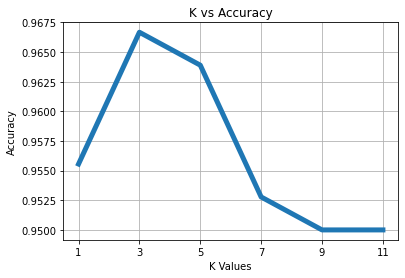

In [194]:
#BEGIN 3.2a
#TODO: Run evaluation for different K and plot K vs Accuracy
# create list to store accuracy for every K value
acc = []
k_values = [1, 3, 5, 7, 9, 11]
for k in k_values:
  nums = Numbers(k=k)
  cm = nums.classify()
  nums_acc = nums.accuracy()
  acc.append(nums_acc)

plt.plot(acc, linewidth=5.0)
plt.title('K vs Accuracy')
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.xticks(list(range(len(k_values))), k_values)
plt.grid()
plt.show()
#END 3.2a

#### 3.2b
TODO: Write of effect of K on classifier accuracy

In order to create the plot above, I used K values 1, 3, 5, 7, 9 and 11. The plot shows that the optimal value for K was when it was equal to 3 since it achieved the highest accuracy and it just tapers off as K increases. I believe this is due to underfitting the data. Another issue I can see is that the classifier would just be "remembering" rather than learning where the nearest neighbors are as the value of K gets higher leading to error as well. 

In [195]:

class NumbersKnobs(Numbers):
    """ Inherits from Numbers, so feel free to use methods from Numbers
    """

    def __init__(self, k=5, train_ratio=0.8):
        #load data from sklearn
        self._k = k
        self.train_ratio = train_ratio
        
        data = sklearn.datasets.load_digits()
        features = data["data"]
        labels = data["target"]
        features = features.reshape(features.shape[0], -1)

        #BEGIN Workspace 3.3a
        self.train_x = np.array(None) # A 2D np.array of training examples, REPLACE
        self.train_y = np.array(None) # A 1D np.array of training answers, REPLACE
        self.test_x = np.array(None) # A 2D np.array of testing examples, REPLACE
        self.test_y = np.array(None) # A 1D np.array of testing answers, REPLACE
        self.classifier = None # KNNClassifier, REPLACE
        
        # TODO: - Divide our dataset into Train and Test datasets (80/20 split),
        #        replacing the variables above
        #       - Initialize the classifier
        #TODO: Divide our dataset into Train and Test datasets (using trainPercentage), replacing the variables above
        # HINT: You should be able to mostly copy your own work from the original Numbers class
        # begin by dividing dataset into training and test sets (80/20 split)
        split = int(train_ratio * len(features))
        self.train_x = features[0:split]
        self.train_y = labels[0:split]
        self.test_x = features[split:]
        self.test_y = labels[split:]

        # randomize training and test data sets
        # motivated by: https://www.delftstack.com/howto/numpy/python-numpy-shuffle-two-arrays/ 
        # training data randomization
        train_rnd = np.arange(len(self.train_x))
        np.random.shuffle(train_rnd)
        self.train_x = self.train_x[train_rnd]
        self.train_y = self.train_y[train_rnd]

        # test data randomization
        test_rnd = np.arange(len(self.test_x))
        np.random.shuffle(test_rnd)
        self.test_x = self.test_x[test_rnd]
        self.test_y = self.test_y[test_rnd]

        # KNN classifier initialization, default number of k neighbors
        self.classifier = KNNClassifier(k=self._k)
        #END Workspace 3.3a


0.5: 0,1,2,3,4,
0.6: 0,1,2,3,4,
0.7: 0,1,2,3,4,


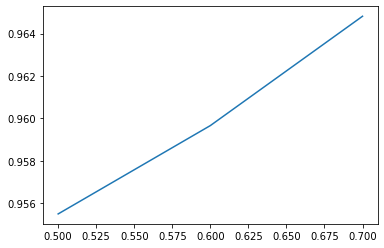

In [196]:
#BEGIN Workspace 3.3b
#TODO: analyze the effect of split ratio
k = 5
repetitions = 5 # Feel free to increase it
split_ratios = np.array([0.5, 0.6, 0.7])
results = np.zeros((len(split_ratios),repetitions))
for i, s in enumerate(split_ratios):
    print(s ,end =": ")
    for j in range(repetitions):
        print(j, end=",")
        numbers = NumbersKnobs(k=k, train_ratio=s)
        results[i,j] = numbers.accuracy() # TODO get accuracy of classification
    print("")
# Add title axis labels to the plot
plt.plot(split_ratios, results.mean(1))

#END Workspace 3.3b

#### 3.3b
TODO: Write of effect of varying the split ratio, ultimately, you can run the classification several times for a fixed K and different split ratios

There's two observations here: the first is that as the amount of training data decreases the classifier becomes less accurate. The second is that as the ratio of the split is increased the accuracy of the classifier goes up. This happens because there is more data that the classifier can be trained on therefore it becomes more robust. Increasing the split ratio though also means that the test set becomes smaller. I'm not sure if there was an error in my implementation here. I would assume that there's a point where increasing the split ratio would start giving less accuracy boosts. 

### Problem 4 : Improving KNN on MNIST using WeightedKNN (30 pts)
Complete the `WeightedKNNClassifier` class to perform the weighted KNN classification.
The Weighted KNN classifier assigns weights to the nearest-neighbor training examples proportional to the inverse-distance from the training example to the query point. Classification is performed by summing the weights associated with each class and predicting the class with the highest weighted-majority vote. Mathematically we might describe the weighted-vote for a class $c$ as 

$$
\textrm{Weighted-Vote}(c)(x) = \sum_{i \in {\cal N}_K(x)} I(y_i \in c) \times \frac{1}{\|{\bf x}_i - {\bf x}\|}
$$
where ${\cal N}_K(x)$ is the set of the closest $k$ neighbors to $x$


4.1 Complete the `fit` method in a similar way to `KNNClassifier` (5 pts)

4.2 Complete `majority_vote`: it's certainly possible that a query point could be distance $0$ away from some training example. If this happens your implementation should handle it and return the appropriate class label. (5 pts)

4.3 Complete `predict` (5 pts)

4.4 Compete `confusion_matrix` and `accuracy` methods (5 pts)

4.5 Compare `KNNClassifier` and `WeightedKNNClassifier` for multiple $K$, make sure that for each run both classifers are fitted using the same train/test split. You can execute multiple runs to mitigate the split randomness. Report for which K you get the best accuracy for each classifier and the best overall classifier. (10 pts)


In [200]:
class WeightedKNNClassifier:
    """
    Class to store data for regression problems 
    """
    def __init__(self, k):
        """
        Creates a kNN instance
        :param k: The number of nearest points to consider in classification
        """
        
        # Import and build the BallTree on training features 
        self._k = k
        self._model = None
        self._y = None
        # Boolean flag indicating whether to do distance weighting (if you want to make it versatile)
        
    def fit(self, features, labels):
        
        # BEGIN Workspace 4.1
        self._model = sklearn.neighbors.BallTree(features)
        self._y = labels
        #END Workspace 4.1

        # Should be used to map set of classes to {0,1,..C-1} where C is the number of classes
        classes = list(set(list(labels)))
        self.label_to_index = dict(zip(sorted(classes), range(len(classes))))
        self.index_to_label = dict(zip(range(len(classes)), sorted(classes)))
        return self

    def majority_vote(self, neighbor_indices, neighbor_distances=None):
        """
        Given indices of nearest neighbors in training set, return the majority label. 
        Break ties by considering 1 fewer neighbor until a clear winner is found. 

        :param neighbor_indices: The indices of the K nearest neighbors in self.X_train 
        :param neighbor_distances: Corresponding distances from query point to K nearest neighbors. 
        """
        # YOUR CODE HERE
        #BEGIN Workspace 4.2
        labels = []
        # take in indices array and flatten
        indices = neighbor_indices.flatten()
        # get labels for corresponding indices
        neighbor_labels = self._y[indices]
        # zip the neighbor indices and distances
        neighbors = list(zip(neighbor_labels, neighbor_distances))
        # labels dictionary
        labels_count = dict.fromkeys(set(neighbor_labels), 0)
        # loop through neighbors and calculated weighted label
        for n in neighbors:
            # if (n[0] in labels_count):
            # try to catch error if a division by zero happens
            # was not able to get this logic to quite work out
            try:
                dist_sum = (1.0 / np.sum(np.array(n[1])))
                labels_count[n[0]] += dist_sum
            except ZeroDivisionError:
                labels_count[n[0]] += (1.0 / np.sum(np.array(n[1])))
        # find label associated with max weight calculated
        labels = max(labels_count, key=labels_count.get)

        #END Workspace 4.2
        return labels
    
    def predict(self, features):
        """
        Given an np.array of query points, return y_hat, an np.array of predictions

        :param features: an (m x p) dimension np.array of points to predict labels for
        """
        labels = None
        # YOUR CODE HERE
        #BEGIN Workspace 4.3
        #TODO: predict labels
        # set answer to empty array 
        labels = np.zeros((features.shape[0],))
        # iterate through number of points
        for i, pt in enumerate(features):
            dist, ind = self._model.query(pt.reshape(1, -1), k=self._k)
            ans = self.majority_vote(ind, dist)
            labels[i] = ans
        #END Workspace 1.3
        #END Workspace 4.3
        return labels
        
    def confusion_matrix(self, features_test, labels_test):
        """
        Generate a confusion matrix for the given test set
        PARAMETERS
        testX - an np.array of feature vectors of test points
        testY - the corresponding correct classifications of our test set
        RETURN
        C - an N*N np.array of counts, where N is the number of classes in our classifier
        """
        c_matrix = np.array(None)
        #BEGIN Workspace 4.4.a
        #TODO: Run classification for the test set, compare to test answers, and add counts to matrix
        # set N equal to number of classes found
        # N = len(self.label_to_index)
        N = 10
        # create confusion matrix initialized with zeros
        c_matrix = np.zeros((N,N))
        # loop through all points in features_test and labels_test arrays
        for i, pt in enumerate(features_test):
            # get class prediction, had to type cast as int because predict function returned float
            predict = int(self.predict(np.array([pt])))
            # predict = classification (column index) from lecture 2 slide 25
            c_matrix[labels_test[i]][predict] += 1
        #END Workspace 4.4.a
    
        return c_matrix
    
    def accuracy(self, features_test, labels_test):
        """
        Generate an accuracy score for the classifier based on the confusion matrix
        PARAMETERS
        C - an np.array of counts
        RETURN
        score - an accuracy score
        """
        score = 0
        #BEGIN Workspace 4.4.b
        #TODO: Compute accuracy of the classification of features_test
        c_matrix = self.confusion_matrix(features_test, labels_test)
        # calculate accuracy. accuracy = # correct / # total (lecture 2 slide 23)
        score = np.trace(c_matrix) / np.sum(c_matrix)
        #END Workspace 4.4.b
        return score 

In [201]:
class NumbersWeighted(NumbersKnobs):
    def __init__(self, k=5, train_ratio=0.8):
        super(NumbersWeighted, self).__init__(k, train_ratio)
        self.classifier = WeightedKNNClassifier(k=self._k)
        

In [202]:
#BEGIN Workspace 4.5
#TODO: Run multiple comparisons
repetitions = 10
ks = [1, 2, 4, 5, 6, 32, 50] # Add more
results_simple = np.zeros((len(ks),repetitions))
results_weighted = np.zeros((len(ks),repetitions))

for i, k in enumerate(ks):
    print(k,end =": ")
    for j in range(repetitions):
        print(j, end=",")
        numbers = NumbersWeighted(k=k)
        results_weighted[i,j] = numbers.accuracy()
        numbers.classifier = KNNClassifier(k=numbers._k)
        results_simple[i,j] =  numbers.accuracy()
    print("")

#TODO Average results over multiple runs and report best classifier
weighted_results_avg = np.mean(results_weighted, axis=1)
simple_results_avg = np.mean(results_simple, axis=1)
print("weighted results avg: ", weighted_results_avg)
print("simple results avg: ", simple_results_avg)
#END Workspace 4.5

1: 0,1,2,3,4,5,6,7,8,9,
2: 0,1,2,3,4,5,6,7,8,9,
4: 0,1,2,3,4,5,6,7,8,9,
5: 0,1,2,3,4,5,6,7,8,9,
6: 0,1,2,3,4,5,6,7,8,9,
32: 0,1,2,3,4,5,6,7,8,9,
50: 0,1,2,3,4,5,6,7,8,9,
weighted results avg:  [0.95555556 0.95555556 0.95555556 0.95555556 0.95555556 0.95555556
 0.95555556]
simple results avg:  [0.95555556 0.96388889 0.96666667 0.96388889 0.95277778 0.94444444
 0.92222222]


#### 4.5
TODO: Report best results per classifier and overall performance. 

After running the simple and weighted classifiers using varying values of K, I printed the results under the runs in the cell above. The simple classifier shows the behavior that was seen with the data set used in the first section where there is an optimal value of K that gives the best results. The weighted classifier gives uniform results across the varying values of K. I believe that this is due to an error of my implementation of the weighted nearest neighbors algorithm however. Overall, the simple nearest neighbors algorithm performed just a little bit better (it was the same in some cases) but better when K=4, which is when it reached the highest accuracy. At K=50, the simple nearest neighbors algorithm performed noticeably worse.  

#### Bonus (5 Points)
__4.6 Is `WeightedKNNClassifier` a consistent classifier? why or why not?__

*4.6 bonus response here*